#  **Hello folks**
# ****Thanks for checking out my notebook and if you find useful please upvote 😊****

# **Lets begin**
> firstly will import the classic and very imp libraries and then read our data

In [62]:
import numpy as np 
import pandas as pd 


import os
# for dirname, _, filenames in os.walk('./'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [5]:
import numpy as np
import pandas as pd
import os
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf

In [64]:
train = Path('./train') #getting the path of the train dataset
train_filepaths = list(train.glob(r'**/*.jpg')) #glob (short for global) is used to return all file paths that match a specific pattern

valid = Path('./validation')#for valid dataset
valid_filepaths = list(valid.glob(r'**/*.jpg'))

test = Path('./test')#for test dataset
test_filepaths = list(test.glob(r'**/*.jpg'))


In [65]:
def process_img(filepath): # passing the filepaths of datasets
    
    labels = [(str(filepath[i])).split("\\")[-2] #here we are trying to extract the labels for the fruits and veggies by using .split method and
              for i in range(len(filepath))] #since names are secound last word we used [-2] to get that particular name
                  
    filepath = pd.Series(filepath, name='FilePath').astype(str)
    labels = pd.Series(labels, name='Label') 
    
    df = pd.concat([filepath, labels], axis=1) 
    df = df.sample(frac=1).reset_index(drop = True)
    
    return df

In [66]:
train_df = process_img(train_filepaths) 
valid_df = process_img(valid_filepaths)
test_df = process_img(test_filepaths)

In [67]:
test_df

,FilePath,Label
0,test\soy beans\Image_10.jpg,soy beans
1,test\pineapple\Image_5.jpg,pineapple
2,test\banana\Image_10.jpg,banana
3,test\mango\Image_8.jpg,mango
4,test\turnip\Image_3.jpg,turnip
...,...,...
335,test\potato\Image_6.jpg,potato
336,test\pear\Image_9.jpg,pear
337,test\ginger\Image_9.jpg,ginger
338,test\potato\Image_9.jpg,potato


In [68]:
train_df.head()

,FilePath,Label
0,train\bell pepper\Image_1.jpg,bell pepper
1,train\banana\Image_9.jpg,banana
2,train\pomegranate\Image_61.jpg,pomegranate
3,train\potato\Image_81.jpg,potato
4,train\jalepeno\Image_67.jpg,jalepeno


In [69]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(set(train_df.Label))}\n')
print(f'Labels: {list(set(train_df.Label))}') 


-- Training set --

Number of pictures: 2855

Number of different labels: 36

Labels: ['chilli pepper', 'beetroot', 'kiwi', 'paprika', 'soy beans', 'pineapple', 'orange', 'potato', 'cauliflower', 'turnip', 'carrot', 'pomegranate', 'cucumber', 'raddish', 'bell pepper', 'cabbage', 'grapes', 'tomato', 'spinach', 'corn', 'jalepeno', 'ginger', 'capsicum', 'lemon', 'mango', 'onion', 'lettuce', 'pear', 'sweetpotato', 'apple', 'peas', 'sweetcorn', 'eggplant', 'garlic', 'banana', 'watermelon']


In [70]:
print(f'Labels: {set(test_df.Label)}')

Labels: {'chilli pepper', 'beetroot', 'kiwi', 'paprika', 'soy beans', 'pineapple', 'orange', 'potato', 'turnip', 'cauliflower', 'carrot', 'pomegranate', 'cucumber', 'raddish', 'bell pepper', 'grapes', 'cabbage', 'tomato', 'spinach', 'corn', 'jalepeno', 'ginger', 'capsicum', 'lemon', 'mango', 'onion', 'lettuce', 'pear', 'sweetpotato', 'apple', 'peas', 'sweetcorn', 'eggplant', 'garlic', 'banana', 'watermelon'}


> # Lets take a look at few images

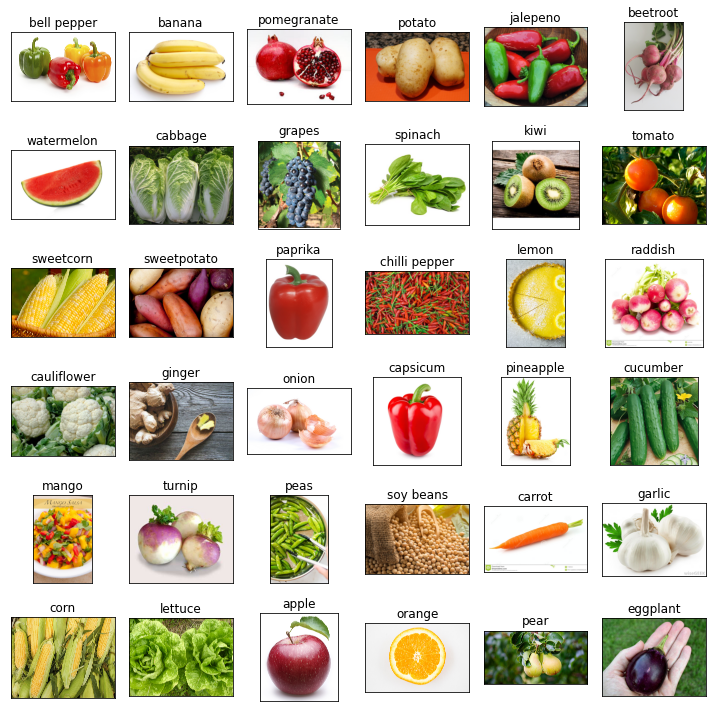

In [71]:
unique_labels = train_df.copy().drop_duplicates(subset=['Label']).reset_index() #we want to see unique images so we are dropping duplicates and since we dont
                                                                                    #want to mess up the original df we are coping it using .copy()

fig, axes = plt.subplots(6,6, figsize=(10,10),subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(unique_labels.FilePath[i]))
    ax.set_title(unique_labels.Label[i], fontsize=12)
    
plt.tight_layout()
plt.show()

**We will do some preprocessing before feeding images to the model**

> #  Data Preprocessing

In [72]:
data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input
)

train_images = data_gen.flow_from_dataframe(
    dataframe = train_df,
    x_col='FilePath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

valid_images = data_gen.flow_from_dataframe(
    dataframe=valid_df,
    x_col='FilePath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

test_images = data_gen.flow_from_dataframe(
    dataframe=test_df,
    x_col='FilePath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)



Found 2855 validated image filenames belonging to 36 classes.
Found 340 validated image filenames belonging to 36 classes.
Found 340 validated image filenames belonging to 36 classes.


**we will use a pretrained Mobilenetv2 model since it has less parameters you can try with diff models as well.
pls refer here :[https://keras.io/api/applications/](http://)**

> # Model Building

In [109]:
# base_model =  tf.keras.applications.inception_v3(
#     include_top=False,
#     weights='imagenet',
#     input_shape=(224,224,3),
#     pooling='avg',
# ) #this is our base model 
base_model = tf.keras.applications.inception_v3.InceptionV3(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)
base_model.trainable = False # we dont want to train the intial weights so we use .trainable = False 

87910968/87910968 [==============================] - 7s 0us/step


In [110]:
base_model.summary() # Lets look at the layers we have in basemodel 

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization (BatchNorm  (None, None, None,   96         ['conv2d[0][0]']                 
 alization)                     32)                                                    

                                                                                                  
 average_pooling2d (AveragePool  (None, None, None,   0          ['max_pooling2d_1[0][0]']        
 ing2D)                         192)                                                              
                                                                                                  
 conv2d_5 (Conv2D)              (None, None, None,   12288       ['max_pooling2d_1[0][0]']        
                                64)                                                               
                                                                                                  
 conv2d_7 (Conv2D)              (None, None, None,   76800       ['activation_6[0][0]']           
                                64)                                                               
                                                                                                  
 conv2d_10

                                                                                                  
 conv2d_18 (Conv2D)             (None, None, None,   16384       ['average_pooling2d_1[0][0]']    
                                64)                                                               
                                                                                                  
 batch_normalization_12 (BatchN  (None, None, None,   192        ['conv2d_12[0][0]']              
 ormalization)                  64)                                                               
                                                                                                  
 batch_normalization_14 (BatchN  (None, None, None,   192        ['conv2d_14[0][0]']              
 ormalization)                  64)                                                               
                                                                                                  
 batch_nor

                                                                                                  
 batch_normalization_25 (BatchN  (None, None, None,   192        ['conv2d_25[0][0]']              
 ormalization)                  64)                                                               
                                                                                                  
 activation_19 (Activation)     (None, None, None,   0           ['batch_normalization_19[0][0]'] 
                                64)                                                               
                                                                                                  
 activation_21 (Activation)     (None, None, None,   0           ['batch_normalization_21[0][0]'] 
                                64)                                                               
                                                                                                  
 activatio

                                128)                                                              
                                                                                                  
 conv2d_36 (Conv2D)             (None, None, None,   114688      ['activation_35[0][0]']          
                                128)                                                              
                                                                                                  
 batch_normalization_31 (BatchN  (None, None, None,   384        ['conv2d_31[0][0]']              
 ormalization)                  128)                                                              
                                                                                                  
 batch_normalization_36 (BatchN  (None, None, None,   384        ['conv2d_36[0][0]']              
 ormalization)                  128)                                                              
          

 ormalization)                  160)                                                              
                                                                                                  
 activation_44 (Activation)     (None, None, None,   0           ['batch_normalization_44[0][0]'] 
                                160)                                                              
                                                                                                  
 conv2d_45 (Conv2D)             (None, None, None,   179200      ['activation_44[0][0]']          
                                160)                                                              
                                                                                                  
 batch_normalization_45 (BatchN  (None, None, None,   480        ['conv2d_45[0][0]']              
 ormalization)                  160)                                                              
          

 activation_48 (Activation)     (None, None, None,   0           ['batch_normalization_48[0][0]'] 
                                192)                                                              
                                                                                                  
 activation_49 (Activation)     (None, None, None,   0           ['batch_normalization_49[0][0]'] 
                                192)                                                              
                                                                                                  
 mixed5 (Concatenate)           (None, None, None,   0           ['activation_40[0][0]',          
                                768)                              'activation_43[0][0]',          
                                                                  'activation_48[0][0]',          
                                                                  'activation_49[0][0]']          
          

 batch_normalization_53 (BatchN  (None, None, None,   576        ['conv2d_53[0][0]']              
 ormalization)                  192)                                                              
                                                                                                  
 batch_normalization_58 (BatchN  (None, None, None,   576        ['conv2d_58[0][0]']              
 ormalization)                  192)                                                              
                                                                                                  
 batch_normalization_59 (BatchN  (None, None, None,   576        ['conv2d_59[0][0]']              
 ormalization)                  192)                                                              
                                                                                                  
 activation_50 (Activation)     (None, None, None,   0           ['batch_normalization_50[0][0]'] 
          

 conv2d_60 (Conv2D)             (None, None, None,   147456      ['mixed6[0][0]']                 
                                192)                                                              
                                                                                                  
 conv2d_63 (Conv2D)             (None, None, None,   258048      ['activation_62[0][0]']          
                                192)                                                              
                                                                                                  
 conv2d_68 (Conv2D)             (None, None, None,   258048      ['activation_67[0][0]']          
                                192)                                                              
                                                                                                  
 conv2d_69 (Conv2D)             (None, None, None,   147456      ['average_pooling2d_6[0][0]']    
          

 batch_normalization_71 (BatchN  (None, None, None,   960        ['conv2d_71[0][0]']              
 ormalization)                  320)                                                              
                                                                                                  
 batch_normalization_75 (BatchN  (None, None, None,   576        ['conv2d_75[0][0]']              
 ormalization)                  192)                                                              
                                                                                                  
 activation_71 (Activation)     (None, None, None,   0           ['batch_normalization_71[0][0]'] 
                                320)                                                              
                                                                                                  
 activation_75 (Activation)     (None, None, None,   0           ['batch_normalization_75[0][0]'] 
          

                                384)                                                              
                                                                                                  
 activation_79 (Activation)     (None, None, None,   0           ['batch_normalization_79[0][0]'] 
                                384)                                                              
                                                                                                  
 activation_82 (Activation)     (None, None, None,   0           ['batch_normalization_82[0][0]'] 
                                384)                                                              
                                                                                                  
 activation_83 (Activation)     (None, None, None,   0           ['batch_normalization_83[0][0]'] 
                                384)                                                              
          

 ormalization)                  384)                                                              
                                                                                                  
 batch_normalization_92 (BatchN  (None, None, None,   1152       ['conv2d_92[0][0]']              
 ormalization)                  384)                                                              
                                                                                                  
 conv2d_93 (Conv2D)             (None, None, None,   393216      ['average_pooling2d_8[0][0]']    
                                192)                                                              
                                                                                                  
 batch_normalization_85 (BatchN  (None, None, None,   960        ['conv2d_85[0][0]']              
 ormalization)                  320)                                                              
          

In [112]:
inputs = base_model.input # this is our input layer which is the base_model's input

x = tf.keras.layers.Dense(128, activation='relu')(base_model.output) #here we passed this base_model.output coz on top of our x layer we want the output(bottom) layer of base_model
x = tf.keras.layers.Dense(256, activation='relu')(x) 

outputs = tf.keras.layers.Dense(36, activation='softmax')(x)# here we have 36 diff classes so we take 36 as output

model = tf.keras.Model(inputs=inputs, outputs=outputs) # we are passing in our inputs and outputs to our model now

model.compile(                                           #lets just compile everthing together 
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [113]:
history = model.fit(                    #fit the model 
    train_images,
    validation_data=valid_images,
    batch_size = 4,
    epochs=5,
    callbacks=[                   #we are using callbacks for early stopping in case our model doesn't show any improvement after 2 epochs monitoring the monitering the validation loss
        tf.keras.callbacks.EarlyStopping(  
            monitor='val_loss',
            patience=2,
            restore_best_weights=True #it literally means wat u think (simpleeeeee)
        )
    ]
)           

Epoch 1/5


ValueError: in user code:

    File "C:\Users\Lenovo\.conda\envs\pytorch\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Lenovo\.conda\envs\pytorch\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Lenovo\.conda\envs\pytorch\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Lenovo\.conda\envs\pytorch\lib\site-packages\keras\engine\training.py", line 890, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\Lenovo\.conda\envs\pytorch\lib\site-packages\keras\engine\training.py", line 948, in compute_loss
        return self.compiled_loss(
    File "C:\Users\Lenovo\.conda\envs\pytorch\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\Lenovo\.conda\envs\pytorch\lib\site-packages\keras\losses.py", line 139, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\Lenovo\.conda\envs\pytorch\lib\site-packages\keras\losses.py", line 243, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\Lenovo\.conda\envs\pytorch\lib\site-packages\keras\losses.py", line 1787, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\Lenovo\.conda\envs\pytorch\lib\site-packages\keras\backend.py", line 5119, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, None) and (None, None, None, 36) are incompatible


In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()  # we are plotting the train and validation accuracy to check on if its overfitting 
plt.title('Accuracy')
plt.show()

In [ ]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.title('Loss')
plt.show()

In [73]:
pred = model.predict(test_images) #its predicting time , our model will try to predict the prob of the particular class 
pred = np.argmax(pred, axis=1) # we are seeing the highest prob value and taking the index of it  

11/11 [==============================] - 13s 1s/step


In [74]:
pred 

array([29, 25,  1, 19, 34, 21,  3, 34, 16, 18, 17, 14, 12,  8,  9,  5, 31,
       28, 24,  6, 13, 33, 20,  5, 35,  0, 22, 26, 24, 10, 18, 19, 24, 11,
        4, 35, 35, 25, 11, 31, 19, 28,  2,  5,  1, 21, 12, 16, 33, 19, 19,
       12, 30, 28, 15,  9, 31, 17,  5, 18, 26,  6,  4, 14, 16,  8,  8,  0,
       10, 27, 34, 14, 13,  4,  5, 12,  4, 35, 26,  3, 20, 30, 29, 11,  0,
       23, 11, 20, 31, 35, 19, 11, 22, 30, 34, 25, 26, 21, 18,  9, 22,  7,
       32, 27, 32,  5, 22,  4, 10, 15, 27,  5, 12, 33, 35, 29, 20, 33, 28,
       15,  5, 22, 10,  8,  4, 23, 35, 33,  5, 19,  2, 31, 18,  6, 10, 32,
       18,  4, 10, 18, 16, 11,  6,  5,  4, 25, 25,  7, 20, 25,  2, 32, 24,
       10, 18, 20, 19, 34,  1, 21, 28, 32, 33, 14,  9,  9, 30, 14, 35,  2,
       12, 34, 17, 29, 21, 33, 13,  7,  1, 14,  9,  6, 13, 16, 12, 33, 30,
       22, 10, 12, 15, 23,  9,  7,  0, 30,  3, 22, 34, 19, 31, 16, 25, 16,
       29,  1, 23,  7, 13, 21,  9, 29, 33, 22, 31,  3, 30, 17, 21, 30,  7,
       17,  9, 18,  7,  0

In [91]:
labels = (train_images.class_indices) #this gives us the labels with indicies to map
labels

{'apple': 0,
 'banana': 1,
 'beetroot': 2,
 'bell pepper': 3,
 'cabbage': 4,
 'capsicum': 5,
 'carrot': 6,
 'cauliflower': 7,
 'chilli pepper': 8,
 'corn': 9,
 'cucumber': 10,
 'eggplant': 11,
 'garlic': 12,
 'ginger': 13,
 'grapes': 14,
 'jalepeno': 15,
 'kiwi': 16,
 'lemon': 17,
 'lettuce': 18,
 'mango': 19,
 'onion': 20,
 'orange': 21,
 'paprika': 22,
 'pear': 23,
 'peas': 24,
 'pineapple': 25,
 'pomegranate': 26,
 'potato': 27,
 'raddish': 28,
 'soy beans': 29,
 'spinach': 30,
 'sweetcorn': 31,
 'sweetpotato': 32,
 'tomato': 33,
 'turnip': 34,
 'watermelon': 35}

In [96]:
labels

{'apple': 0,
 'banana': 1,
 'beetroot': 2,
 'bell pepper': 3,
 'cabbage': 4,
 'capsicum': 5,
 'carrot': 6,
 'cauliflower': 7,
 'chilli pepper': 8,
 'corn': 9,
 'cucumber': 10,
 'eggplant': 11,
 'garlic': 12,
 'ginger': 13,
 'grapes': 14,
 'jalepeno': 15,
 'kiwi': 16,
 'lemon': 17,
 'lettuce': 18,
 'mango': 19,
 'onion': 20,
 'orange': 21,
 'paprika': 22,
 'pear': 23,
 'peas': 24,
 'pineapple': 25,
 'pomegranate': 26,
 'potato': 27,
 'raddish': 28,
 'soy beans': 29,
 'spinach': 30,
 'sweetcorn': 31,
 'sweetpotato': 32,
 'tomato': 33,
 'turnip': 34,
 'watermelon': 35}

In [76]:
labels = dict((v,k) for k,v in labels.items()) 
pred = [labels[k] for k in pred] #we are iterating over the pred and taking the label for that particualar value

y_test = [labels[k] for k in test_images.classes]  #we are taking labels for test images 


In [77]:
from sklearn.metrics import accuracy_score # Lets see how well our model is performing 
acc = accuracy_score(y_test, pred)
print(f'Accuracy on the test set: {100*acc:.2f}%')

Accuracy on the test set: 95.88%


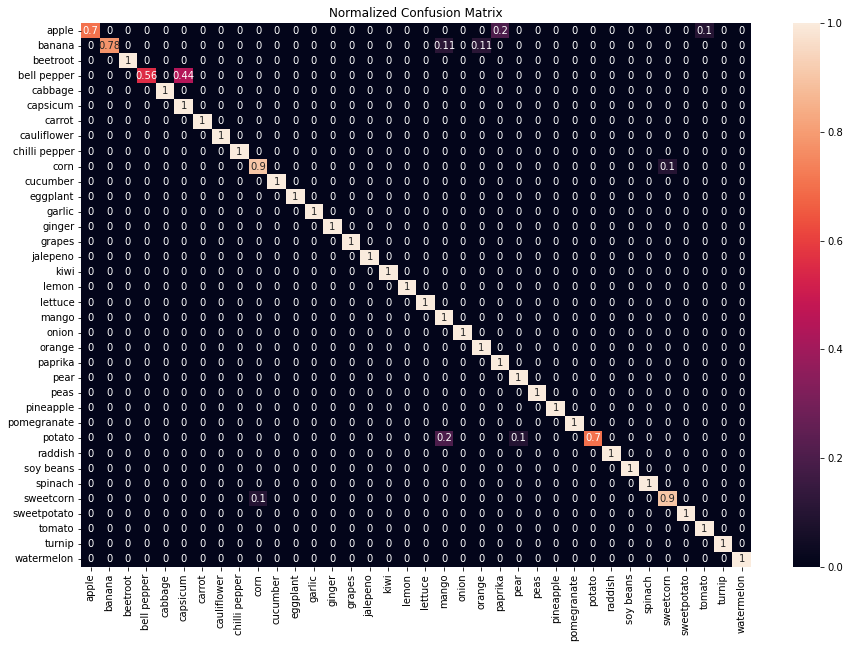

In [78]:
from sklearn.metrics import confusion_matrix #lets visualise the model predictions 
import seaborn as sns
cf_matrix = confusion_matrix(y_test, pred, normalize='true')  
plt.figure(figsize=(15,10))
sns.heatmap(cf_matrix, annot=True,
            xticklabels = sorted(set(y_test)), #we put this to see labels
            yticklabels = sorted(set(y_test))
           )
plt.title('Normalized Confusion Matrix')
plt.show()

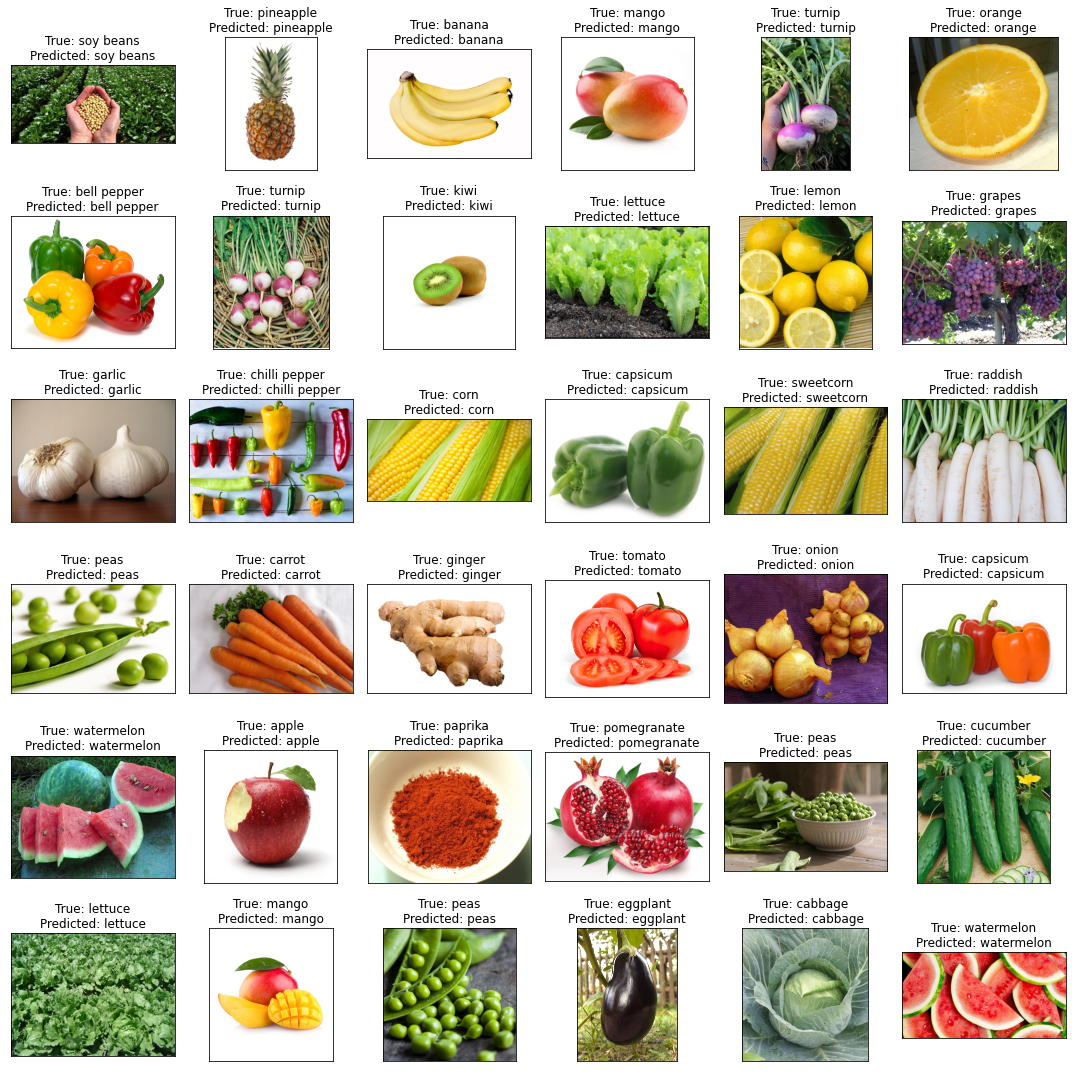

In [79]:
fig, axes = plt.subplots(6,6,figsize=(15,15), subplot_kw={'xticks': [], 'yticks': []}) #will see the actual and predicted labels with images.

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.FilePath.iloc[i]))
    ax.set_title(f"True: {test_df.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

# *Our model did a fantastic job yipeeeee🎉🎉🎉🎉🥳🥳🥳*


# *THANKYOU FOR UPVOTING✨ ✨ ✨ ✨ ✨*

In [ ]:
# Save the weights
model.save_weights('./checkpoints/my_checkpoint')

In [ ]:
# Save the entire model as a SavedModel.
model.save('saved_model/model.h5')

In [1]:
from keras.models import load_model

model =load_model('saved_model/model.h5')

In [2]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [3]:
def process_img(filepath): # passing the filepaths of datasets
    
    labels = [(str(filepath[i])).split(".")[-2] #here we are trying to extract the labels for the fruits and veggies by using .split method and
              for i in range(len(filepath))] #since names are secound last word we used [-2] to get that particular name
                  
    filepath = pd.Series(filepath, name='FilePath').astype(str)
    labels = pd.Series(labels, name='Label') 
    
    df = pd.concat([filepath, labels], axis=1) 
    df = df.sample(frac=1).reset_index(drop = True)
    
    return df

1/1 [==============================] - 0s 20ms/step


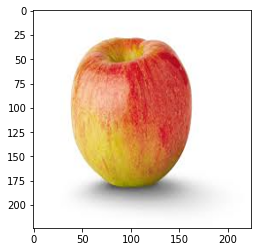

In [27]:
import cv2
single_image = cv2.imread('./test_imgs/apple2.jfif')
# plt.imshow(single_image)
single_image = cv2.cvtColor(single_image, cv2.COLOR_RGB2BGR)
single_image = cv2.resize(single_image, dsize=(224,224), interpolation=cv2.INTER_CUBIC)
plt.imshow(single_image)
single_image = np.array(single_image)
single_image = single_image[np.newaxis,:,:]
prediction = model.predict(single_image)

In [28]:
np.argmax(prediction)

17

In [29]:
labels = ['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']
labels[np.argmax(prediction)]

'lemon'

In [26]:
# labels = dict((v,k) for k,v in labels.items()) 